In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("Crop_recommendation.csv")

In [3]:
X = data.drop('label', axis=1)  # Features
y = data['label']  
from collections import Counter
print(Counter(y))

Counter({'rice': 100, 'maize': 100, 'chickpea': 100, 'kidneybeans': 100, 'pigeonpeas': 100, 'mothbeans': 100, 'mungbean': 100, 'blackgram': 100, 'lentil': 100, 'pomegranate': 100, 'banana': 100, 'mango': 100, 'grapes': 100, 'watermelon': 100, 'muskmelon': 100, 'apple': 100, 'orange': 100, 'papaya': 100, 'coconut': 100, 'cotton': 100, 'jute': 100, 'coffee': 100})


In [4]:
print(X)
print(y)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [5]:
data.size


17600

In [6]:
data.shape


(2200, 8)

In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9863636363636363


In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9931818181818182


In [12]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9795454545454545


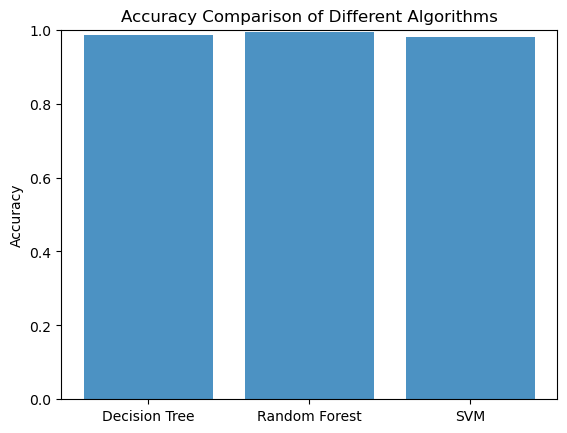

In [13]:
classifiers = [dt_classifier, rf_classifier, svm_classifier]
accuracy_scores = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
classifiers_names = ['Decision Tree', 'Random Forest', 'SVM']
x_pos = np.arange(len(classifiers_names))

plt.bar(x_pos, accuracy_scores, align='center', alpha=0.8)
plt.xticks(x_pos, classifiers_names)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0, 1.0)  # Set the y-axis limit to [0, 1.0] for better visualization
plt.show()






In [14]:
def recommend_crop(new_data):
    
    new_data_df = pd.DataFrame([new_data])
    predicted_crop = rf_classifier.predict(new_data_df)[0]
    return predicted_crop
new_data = {
    'N': 40,
    'P': 54,
    'K': 80,  
    'temperature': 25.87974371,
    'humidity': 80.00274423,
    'ph': 6.502985292000001,
    'rainfall': 250.9355362
}
recommended_crop = recommend_crop(new_data)
print("Recommended Crop:", recommended_crop)

Recommended Crop: papaya
